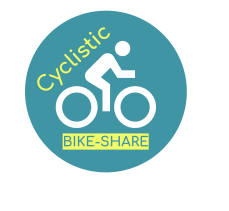

Cyclistic introduced a popular bike-share program in 2016. The initiative has expanded since then to include a fleet of 5,824 bicycles that are geotracked and locked into a system of 692 stations across Chicago. The bicycles can at any time be unlocked from one station and brought back to any other station in the network.
The Goal is to Design marketing strategies aimed at converting casual riders into annual members.The stake holders are interested in analyzing the Cyclistic historical bike trip data to identify trends.
My Task is to help the marketing analyst team understand:
1. How annual members and casual riders differ
2. Why casual riders would buy a membership and
3. How digital media could affect their marketing tactics.

The dataset used in this project contains Cyclistic’s historical trip data of the year 2019.

Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

Importing Dataset

link to dataset: https://divvy-tripdata.s3.amazonaws.com/index.html

In [2]:
#Importing the first quarter of the 2019 dataset
q1 = pd.read_csv("Cyclistic_Q1_2019.csv")
q1

,trip_id,start_time,end_time,start_day,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age_Category
0,21742443,2019/01/01 00:04,2019/01/01 00:11,Tue,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,Adolescence
1,21742444,2019/01/01 00:08,2019/01/01 00:15,Tue,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,Adolescence
2,21742445,2019/01/01 00:13,2019/01/01 00:27,Tue,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,Young
3,21742446,2019/01/01 00:13,2019/01/01 00:43,Tue,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,Young
4,21742447,2019/01/01 00:14,2019/01/01 00:20,Tue,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346972,22178524,2019/03/31 23:51,2019/04/01 00:04,Sun,1501,757,38,Clark St & Lake St,29,Noble St & Milwaukee Ave,Subscriber,Male,1993,Young
346973,22178525,2019/03/31 23:52,2019/03/31 23:58,Sun,3270,332,129,Blue Island Ave & 18th St,202,Halsted St & 18th St,Subscriber,Male,1992,Young
346974,22178526,2019/03/31 23:52,2019/04/01 00:06,Sun,3584,846,283,LaSalle St & Jackson Blvd,273,Michigan Ave & 18th St,Subscriber,Male,1984,Adolescence
346975,22178527,2019/03/31 23:53,2019/03/31 23:56,Sun,4384,178,321,Wabash Ave & 9th St,39,Wabash Ave & Adams St,Subscriber,Male,1969,Old


In [3]:
#Importing the second quarter of the 2019 dataset
q2 = pd.read_csv("Cyclistic_Q2_2019.csv")
q2

,trip_id,start_time,end_time,start_day,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age_Category
0,22178529,2019/04/01 00:02,2019/04/01 00:09,Mon,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975,Old
1,22178530,2019/04/01 00:03,2019/04/01 00:20,Mon,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984,Adolescence
2,22178531,2019/04/01 00:11,2019/04/01 00:15,Mon,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990,Adolescence
3,22178532,2019/04/01 00:13,2019/04/01 00:18,Mon,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993,Young
4,22178533,2019/04/01 00:19,2019/04/01 00:36,Mon,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883349,23410122,2019/06/27 17:19,2019/06/27 17:34,Thu,6379,942,195,Columbus Dr & Randolph St,141,Clark St & Lincoln Ave,Subscriber,Male,1994,Young
883350,23410123,2019/06/27 17:19,2019/06/27 17:43,Thu,5175,1441,125,Rush St & Hubbard St,87,Racine Ave & Fullerton Ave,Subscriber,Female,1991,Adolescence
883351,23410124,2019/06/27 17:19,2019/06/27 17:24,Thu,2921,354,174,Canal St & Madison St,81,Daley Center Plaza,Subscriber,Male,1990,Adolescence
883352,23410125,2019/06/27 17:19,2019/06/27 17:34,Thu,5269,897,192,Canal St & Adams St,59,Wabash Ave & Roosevelt Rd,Subscriber,Male,1982,Adolescence


In [4]:
#Importing the third quarter of the 2019 dataset
q3 = pd.read_csv("Cyclistic_Q3_2019.csv")
q3

,trip_id,start_time,end_time,start_day,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age_Category
0,23479388,2019/07/01 00:00,2019/07/01 00:20,Mon,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992,Young
1,23479393,2019/07/01 00:02,2019/07/01 00:07,Mon,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990,Adolescence
2,23479406,2019/07/01 00:06,2019/07/01 00:26,Mon,2758,1171,624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995,Young
3,23479408,2019/07/01 00:08,2019/07/01 00:20,Mon,2447,703,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970,Old
4,23479409,2019/07/01 00:08,2019/07/01 00:27,Mon,6336,1150,257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859198,24607306,2019/08/26 17:18,2019/08/26 17:23,Mon,300,329,286,Franklin St & Adams St (Temp),175,Wells St & Polk St,Subscriber,Male,1977,Old
859199,24607308,2019/08/26 17:18,2019/08/26 17:51,Mon,6443,1983,68,Clinton St & Tilden St,177,Theater on the Lake,Subscriber,Male,1976,Old
859200,24607309,2019/08/26 17:18,2019/08/26 17:40,Mon,3558,1359,52,Michigan Ave & Lake St,282,Halsted St & Maxwell St,Subscriber,Male,1989,Adolescence
859201,24607310,2019/08/26 17:18,2019/08/26 17:28,Mon,5055,622,283,LaSalle St & Jackson Blvd,125,Rush St & Hubbard St,Subscriber,Male,1978,Old


In [5]:
#Importing the last quarter of the 2019 dataset
q4 = pd.read_csv("Cyclistic_Q4_2019.csv")
q4

,trip_id,start_time,end_time,start_day,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age_Category
0,25223640,2019/10/01 00:01,2019/10/01 00:17,Tue,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987,Adolescence
1,25223641,2019/10/01 00:02,2019/10/01 00:06,Tue,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998,Young
2,25223642,2019/10/01 00:04,2019/10/01 00:18,Tue,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991,Adolescence
3,25223643,2019/10/01 00:04,2019/10/01 00:43,Tue,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990,Adolescence
4,25223644,2019/10/01 00:04,2019/10/01 00:35,Tue,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987,Adolescence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642289,25962900,2019/12/31 23:56,2020/01/01 00:15,Tue,2196,1172,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981,Old
642290,25962901,2019/12/31 23:56,2020/01/01 00:22,Tue,4877,1533,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992,Young
642291,25962902,2019/12/31 23:57,2020/01/01 00:05,Tue,863,520,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967,Old
642292,25962903,2019/12/31 23:57,2020/01/01 00:05,Tue,2637,514,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970,Old


In [7]:
#Joining the q1, q2, q3, q4 dataset to make up the full dataset for the entire year
cyclistic = pd.concat([q1, q2, q3, q4], axis = 0)
cyclistic

,trip_id,start_time,end_time,start_day,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Age_Category
0,21742443,2019/01/01 00:04,2019/01/01 00:11,Tue,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,Adolescence
1,21742444,2019/01/01 00:08,2019/01/01 00:15,Tue,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,Adolescence
2,21742445,2019/01/01 00:13,2019/01/01 00:27,Tue,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,Young
3,21742446,2019/01/01 00:13,2019/01/01 00:43,Tue,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,Young
4,21742447,2019/01/01 00:14,2019/01/01 00:20,Tue,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642289,25962900,2019/12/31 23:56,2020/01/01 00:15,Tue,2196,1172,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981,Old
642290,25962901,2019/12/31 23:56,2020/01/01 00:22,Tue,4877,1533,90,Millennium Park,90,Millennium Park,Subscriber,Male,1992,Young
642291,25962902,2019/12/31 23:57,2020/01/01 00:05,Tue,863,520,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967,Old
642292,25962903,2019/12/31 23:57,2020/01/01 00:05,Tue,2637,514,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970,Old


# Data Cleaning

In [9]:
#Splitting time from date in the start_time column
cyclistic_start_time = cyclistic["start_time"].str.split(" ",expand = True,  n = 0)
start_date = cyclistic_start_time[0]
cyclistic.insert(loc = 2, column = "start_date", value = start_date)

#splitting time from the start_time column
start_time = cyclistic_start_time[1]

#Inserting the splitted start_time from the start time column
cyclistic.insert(loc = 3, column = "start time", value = start_time)

#splitting time and date from the end time column
cyclistic_end_time = cyclistic["end_time"].str.split(" ", expand = True, n= 2)

#Inserting the end date into the datafram
end_date = cyclistic_end_time[0]
cyclistic.insert(loc = 5, column = "end_date", value = end_date)

#Inserting the end date into the datafram
end_time = cyclistic_end_time[1]
cyclistic.insert(loc = 6, column = "end time", value = end_time)

#Dropping unsed columns
cyclistic = cyclistic.drop(columns = ["start_time", "end_time"])
cyclistic[["start_date","end_date"]] = cyclistic[["start_date", "end_date"]].apply(pd.to_datetime)

#Dropping null values
cyclistic = cyclistic.dropna(subset = ["tripduration", "birthyear"])

#Changing the formart of birthyear  and tripduration column to int64
cyclistic["birthyear"] = cyclistic["birthyear"].astype("int64")

#Renaming the columns
cyclistic = cyclistic.rename(columns = {"start time":"start_time", "end time":"end_time", "bikeid":"bike_id", 
                          "tripduration":"trip_duration","from_station_name":"from_station",
                          "to_station_name":"to_station", "usertype":"Subscription"})

#Repalacing Subscriber with Subscribed Rider and Customer with Casual Rider
cyclistic = cyclistic.replace({"Subscription" : {"Subscriber":"Subscribed Rider","Customer":"Casual Rider"}})

Cleaned Dataset

In [10]:
cyclistic

,trip_id,start_date,start_time,end_date,end_time,start_day,bike_id,trip_duration,from_station_id,from_station,to_station_id,to_station,Subscription,gender,birthyear,Age_Category
0,21742443,2019-01-01,00:04,2019-01-01,00:11,Tue,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscribed Rider,Male,1989,Adolescence
1,21742444,2019-01-01,00:08,2019-01-01,00:15,Tue,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscribed Rider,Female,1990,Adolescence
2,21742445,2019-01-01,00:13,2019-01-01,00:27,Tue,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscribed Rider,Female,1994,Young
3,21742446,2019-01-01,00:13,2019-01-01,00:43,Tue,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscribed Rider,Male,1993,Young
4,21742447,2019-01-01,00:14,2019-01-01,00:20,Tue,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscribed Rider,Male,1994,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642289,25962900,2019-12-31,23:56,2020-01-01,00:15,Tue,2196,1172,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscribed Rider,Male,1981,Old
642290,25962901,2019-12-31,23:56,2020-01-01,00:22,Tue,4877,1533,90,Millennium Park,90,Millennium Park,Subscribed Rider,Male,1992,Young
642291,25962902,2019-12-31,23:57,2020-01-01,00:05,Tue,863,520,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscribed Rider,Male,1967,Old
642292,25962903,2019-12-31,23:57,2020-01-01,00:05,Tue,2637,514,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscribed Rider,Female,1970,Old


# Analysis

Determining which membership plan the majority of riders utilize:

I sorted the dataframe by the column "Subscription" to determine how many rides Causal Riders and Subscribed Riders have.

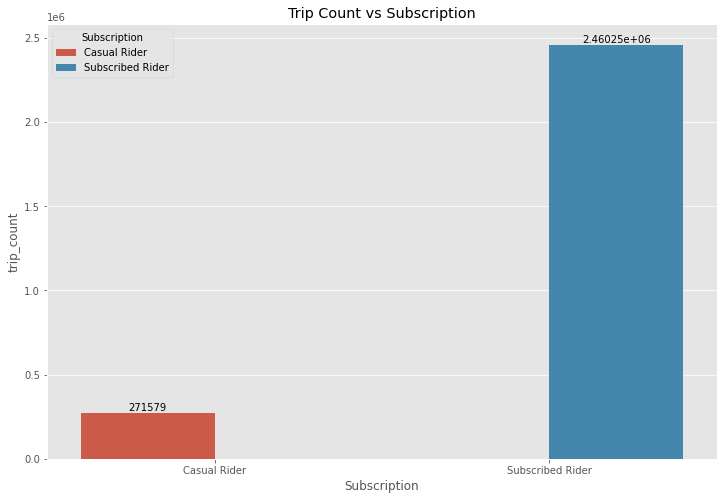

In [10]:
#Grouping by Subscription
membership_count = cyclistic.groupby("Subscription")["trip_id"].count()

#Framing the dataset
membership_count = membership_count.to_frame()

#Reseting the index
membership_count = membership_count.reset_index()

#Renaming the trip_id column
membership_count = membership_count.rename(columns = {"trip_id":"trip_count"})

#Visualization
ax = sn.barplot(x = "Subscription", y = "trip_count", data = membership_count, hue = "Subscription" )
plt.title("Trip Count vs Subscription")
for i in ax.containers:
    ax.bar_label(i,)

This visaulization demonstrates that the vast majority of cyclists are members of their yearly membership plan.

Percentage of Cyclistic Casual Riders:

In this section, we investigate what percentage of cyclistic riders have not signed up for the yearly membership plan.

In [11]:
total_ride_count = membership_count["trip_count"].sum()
casual_rider_trip_count = membership_count.loc[0, "trip_count"]
percentage_of_casual_riders = casual_rider_trip_count/total_ride_count * 100
percentage_of_casual_riders.round(2)

9.94

This Indicates that 9.94% of Cylistic riders are Casual Riders

Calculating the percentage of Casual Riders Cyclistic has:

In this section, we investigate what percentage of cyclistic riders have signed up for their yearly membership plan.

In [12]:
total_ride_count = membership_count["trip_count"].sum()
Annual_rider_trip_count = membership_count.loc[1, "trip_count"]
percentage_of_annual_riders = Annual_rider_trip_count/total_ride_count * 100
percentage_of_annual_riders.round(2)

90.06

This Indicates that 90.06% of Cylistic riders are Subscribed to the yearly membership plan

Identifying which subscription plan each gender uses:

I grouped the dataset by subscription and gender to see how many male and female riders are casual or subscribed riders

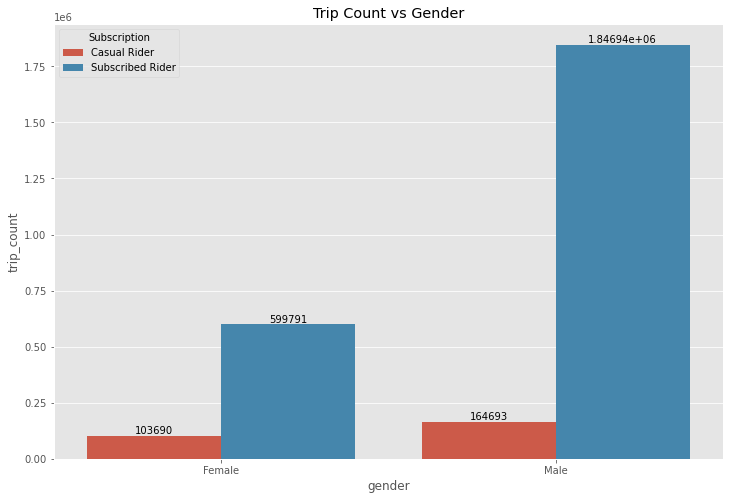

In [13]:
#Grouping Subscription and Gender by trip count
grouped_by_gender = cyclistic.groupby(["Subscription", "gender"])["trip_id"].count()

#Framing the data
grouped_by_gender = grouped_by_gender.to_frame()

#Reseting the Index
grouped_by_gender = grouped_by_gender.reset_index()

#Renaming the column
grouped_by_gender = grouped_by_gender.rename(columns = {"trip_id":"trip_count"})

#Visualization
ax = sn.barplot(x = "gender", y = "trip_count", data = grouped_by_gender, hue = "Subscription")
plt.title("Trip Count vs Gender")
for i in ax.containers:
    ax.bar_label(i,)  

As can be seen, the majority of both casual and subscribed members are male.

Identifying the ride count of Casual Rider and Subscribed Riders by each month of the year 2019 (trip duration):

I grouped the dataset into months and subscription plans, and then used trip_id column(trip count) as the aggregate function.

In [71]:
#Filtering subscribed rider out of the dataset
casualrider = cyclistic[cyclistic["Subscription"] == "Casual Rider"]

#Sorting by Month of the year in the start_date column
casual_rider_month_ride_count = casualrider.groupby(casualrider['start_date'].dt.strftime('%B'))['trip_id'].count().sort_values()
casual_rider_month_ride_count = casual_rider_month_ride_count.to_frame()

#Reseting the Index
casual_rider_month_ride_count = casual_rider_month_ride_count.reset_index()

#Ordering by Months of the Year
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', "August", "October", "November", "December"]
casual_rider_month_ride_count = casual_rider_month_ride_count.groupby(['start_datetr']).sum().reindex(cats)

#Reseting the Index again
casual_rider_month_ride_count = casual_rider_month_ride_count.reset_index()

#Filtering subscribed rider out of the dataset
subscribedrider = cyclistic[cyclistic["Subscription"] == "Subscribed Rider"]

#Sorting by Month of the year in the start_date column
subscribed_rider_month_ride_count = subscribedrider.groupby(subscribedrider['start_date'].dt.strftime('%B'))['trip_id'].count().sort_values()
subscribed_rider_month_ride_count = subscribed_rider_month_ride_count.to_frame()

#Reseting the Index
subscribed_rider_month_ride_count = subscribed_rider_month_ride_count.reset_index()

#Ordering by Months of the Year
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', "August", "October", "November", "December"]
subscribed_rider_month_ride_count = subscribed_rider_month_ride_count.groupby(['start_date']).sum().reindex(cats)

#Reseting the Index again
subscribed_rider_month_ride_count = subscribed_rider_month_ride_count.reset_index()

#Merging the two tables together
month_ride_count = casual_rider_month_ride_count.merge(subscribed_rider_month_ride_count, how = "inner", on = "start_date")

#Renaming the column 
month_ride_count = month_ride_count.rename(columns = {"trip_id_x":"Casual Riders Trip Count", "trip_id_y":"Subscribed Riders Trip Count", "start_date":"start_month"})
month_ride_count

,start_month,Casual Riders Trip Count,Subscribed Riders Trip Count
0,January,1209,98419
1,February,739,93259
2,March,4089,149262
3,April,13275,216988
4,May,23960,285225
5,June,35192,308714
6,July,76271,380417
7,August,71581,330934
8,October,31043,300243
9,November,7952,158281


<AxesSubplot:xlabel='start_month', ylabel='Casual Riders Trip Count'>

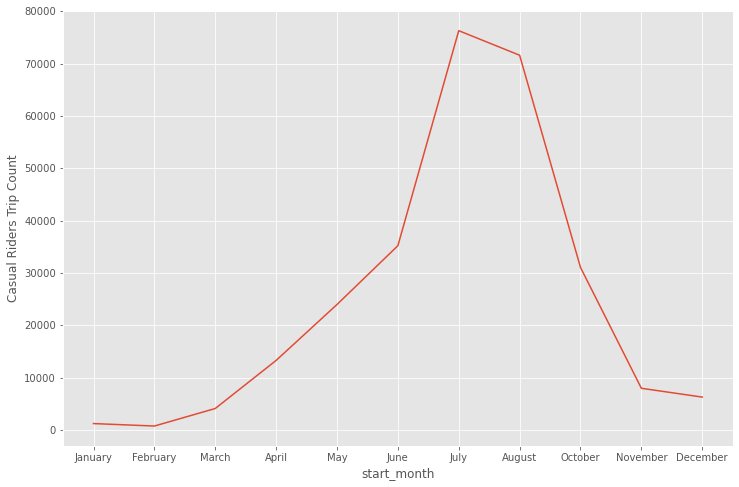

In [69]:
#Visualizing the trip count of casual riders throughout the year 2019
sn.lineplot(x = "start_month",y = "Casual Riders Trip Count", data = month_ride_count)

This visualization shows that the number of casual riders increases from the middle of the year (June) to the end of the year (October). It is low at the start of the year and at the end of the year.

<AxesSubplot:xlabel='start_month', ylabel='Subscribed Riders Trip Count'>

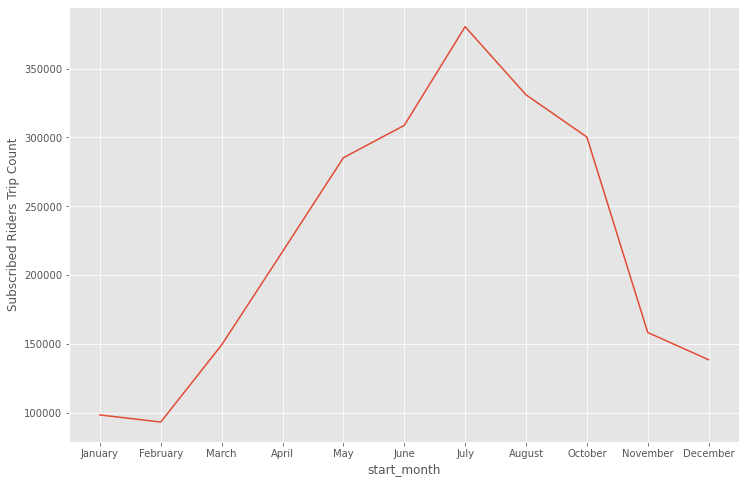

In [70]:
#Visualizing the trip count of subscribed riders throughout the year 2019
sn.lineplot(x = "start_month",y = "Subscribed Riders Trip Count", data = month_ride_count)

This visualization also shows that subscription riders ride the most in the middle of the year(May) till almost the end of the year(October). It is lowest in the beginning and end of the year.

Identifying how Casual Rider and Subscribed Riders spends time riding by the Day the day of the week(trip duration):

I grouped the dataset into days of the week and subscription plans, and then used the mean of trip duration as the aggregate function.

In [51]:
#Grouping by start_day and the subscription plan
weekday_by_average_ride_length = cyclistic.groupby(["start_day", "Subscription"])["trip_duration"].mean()

#Changing it to frame
weekday_by_average_ride_length = weekday_by_average_ride_length.to_frame()

#Resetinng the Data Frame Index 
weekday_by_average_ride_length = weekday_by_average_ride_length.reset_index()

#Exported my data set to csv, sorted it in excel and read it back in
#weekday_by_average_ride_length = weekday_by_average_ride_length.to_csv("weekday_by_average_ride_length.csv", header = True)
weekday_by_average_ride_length = pd.read_csv("weekday_by_average_ride_length.csv")

#Filtering to get the weekday_by_average_ride_length of casual riders
casual_rider_weekday_by_average_ride_length = weekday_by_average_ride_length[weekday_by_average_ride_length["Subscription"] == "Casual Rider"]

#Filtering to get the weekday_by_average_ride_length of subscribed rider
subscribed_rider_weekday_by_average_ride_length = weekday_by_average_ride_length[weekday_by_average_ride_length["Subscription"] == "Subscribed Rider"]

Text(0, 0.5, 'trip duration in seconds')

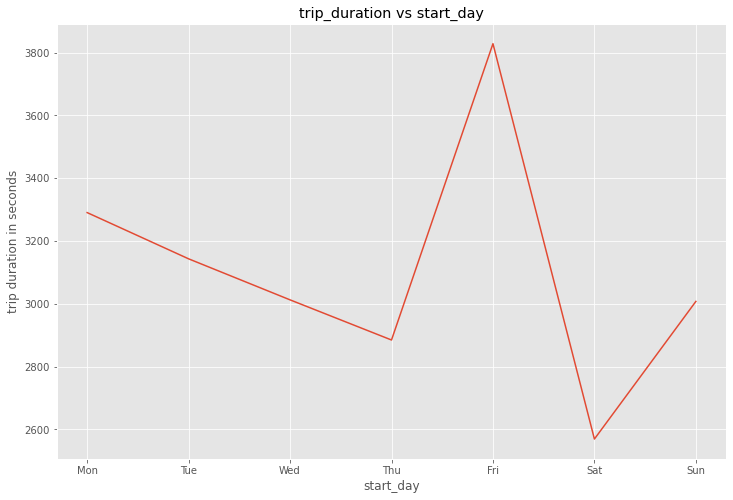

In [52]:
#Visualizing the trip_duration of casual riders by day of the week 
sn.lineplot(x = "start_day", y = "trip_duration", data = casual_rider_weekday_by_average_ride_length)
plt.title("trip_duration vs start_day")
plt.ylabel("trip duration in seconds")

This visualization demonstrates that the trip duration of casual riders decreases progressively from the start of the week until midweek (Thursday), then rapidly increases between Thursday and Friday. The journey time then decreased again from Friday to Saturday before it gradually increases again.

Text(0.5, 1.0, 'trip_duration vs start_day')

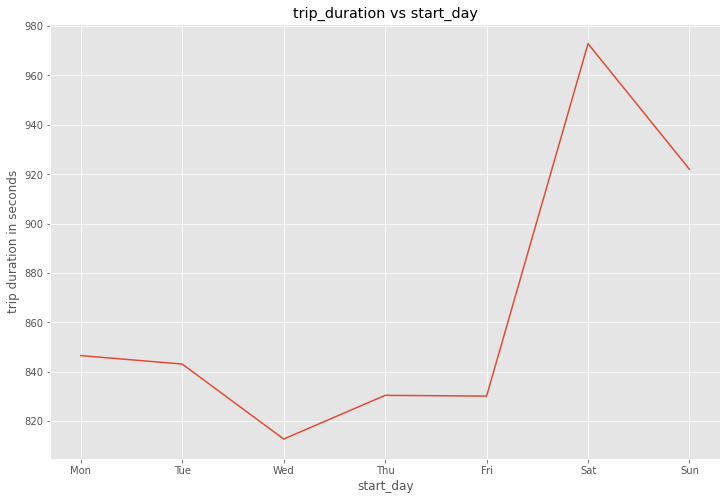

In [20]:
#Visualizing the trip_duration of Subscribed riders by day of the week 
sn.lineplot(x = "start_day", y = "trip_duration", data = subscribed_rider_weekday_by_average_ride_length)
plt.ylabel("trip duration in seconds")
plt.title("trip_duration vs start_day")

We can also notice that the travel time is low from the beginning of the week(Monday) till Friday and increases from Friday to Saturday.

Identifying which day of the week do Casual Rider and Subscribed Rider ride the most(by Ride Count):

I grouped the dataset between weekdays and subscription plans, and then used trip count as the aggregate function.

In [24]:
#Grouping by ride count
weekday_by_ride_count = cyclistic.groupby(["start_day","Subscription"])["trip_id"].count()

#Converting the data to frame
weekday_by_ride_count = weekday_by_ride_count.to_frame()

#Reseting the Index
weekday_by_ride_count = weekday_by_ride_count.reset_index()

#Exporting the dataset to excel to sort it by day of the week and importing it back
#weekday_by_ride_count.to_csv("weekday_by_ride_count.csv", header = True)
weekday_by_ride_count = pd.read_csv("weekday_by_ride_count.csv")

#Renaming the trip_id column to trip count
weekday_by_ride_count = weekday_by_ride_count.rename(columns= {"trip_id":"trip_count"})

#Filtering to Identifying which day of the week do casual riders ride the most by ride count
casual_rider_weekday_by_ride_count = weekday_by_ride_count[weekday_by_ride_count["Subscription"] == "Casual Rider"]

#Filtering to Identifying which day of the week do Subscribed riders rider the most by ride count
Annual_rider_weekday_by_ride_count = weekday_by_ride_count[weekday_by_ride_count["Subscription"] == "Subscribed Rider"]

Text(0.5, 1.0, ' Casual Riders Trip_Count vs Start_Day')

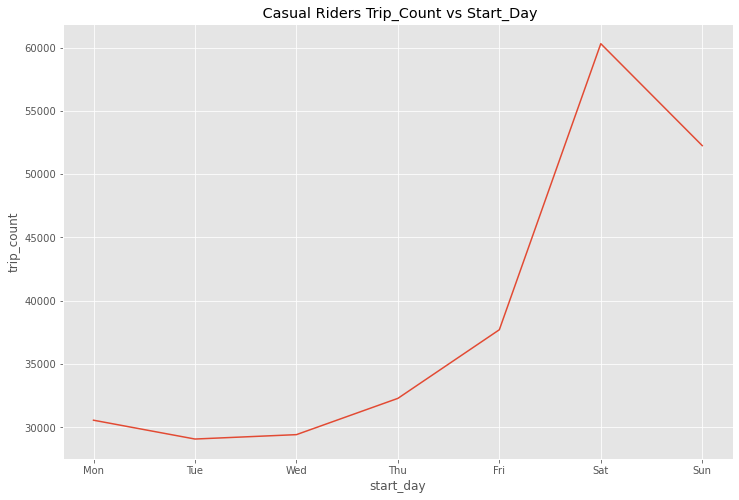

In [25]:
#Visualizing Casual Rider trip count by the day of the week
sn.lineplot(x = "start_day", y = "trip_count", data = casual_rider_weekday_by_ride_count)
plt.title(" Casual Riders Trip_Count vs Start_Day")

We can observe that the casual ride count gradually increase from beginning of the week till friday, when the ride count spiked till saturday then it steadily decreases till Monday.

Text(0.5, 1.0, 'Subscribed Rider Trip_Count vs Start_Day')

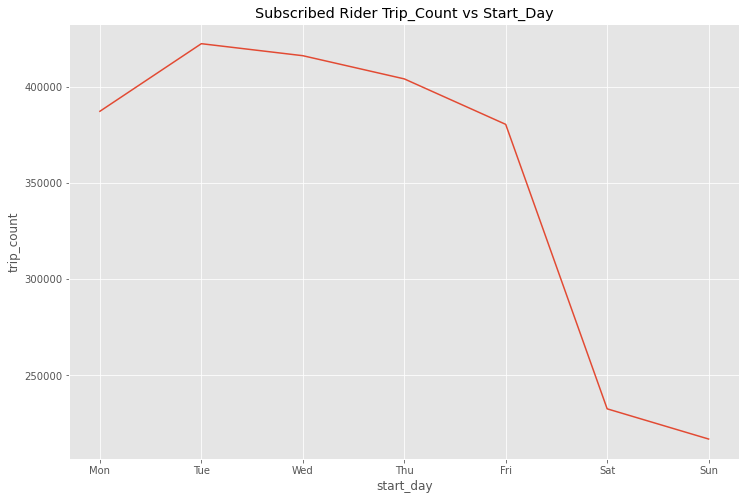

In [26]:
#Visualizing Subscribed Rider trip count by the day of the week
sn.lineplot(x = "start_day", y = "trip_count", data = Annual_rider_weekday_by_ride_count)
plt.title("Subscribed Rider Trip_Count vs Start_Day")

This visualization demonstrates that the number of Subscribed Rider is high during the week and reduced drastically into the weekend (Friday till Sunday)

Identifying how different age groups ride differently:

I grouped the dataset by Age Category and Subscription and used trip count as an aggregate function to determine which age group rides Cyclistic bikes the most

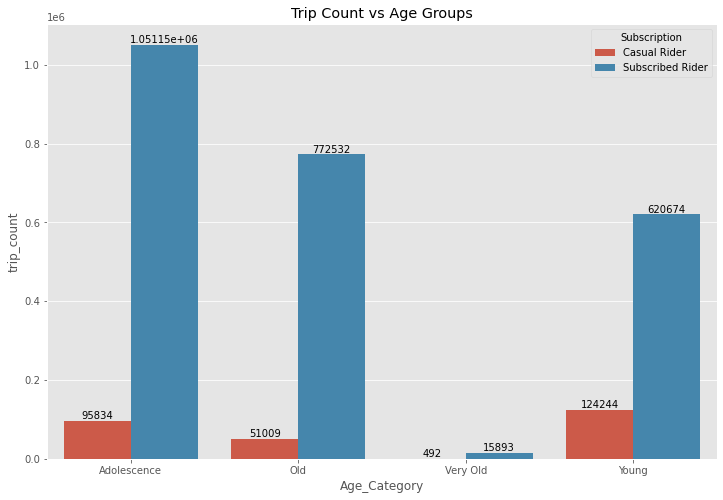

In [27]:
#Grouping Age Category and Subscription by trip_count
grouped_by_age_group = cyclistic.groupby(["Age_Category", "Subscription"])["trip_id"].count()

#Framing the dataset
grouped_by_age_group = grouped_by_age_group.to_frame()

#Reseting the Index
grouped_by_age_group = grouped_by_age_group.reset_index()

#Renaming the trip_id columns
grouped_by_age_group = grouped_by_age_group.rename(columns = {"trip_id":"trip_count"})

#Visualization
ax = sn.barplot(y = "trip_count", x = "Age_Category", data = grouped_by_age_group, hue = "Subscription" )
plt.title("Trip Count vs Age Groups")
for i in ax.containers:
    ax.bar_label(i,)

We can observe that the majority of the subscribed riders are Adult and Old, since they both have over 1,000,000 rides count.

Identifying how diffrent age category of Casual Riders ride diffrently:

Since the preceding visualization does not provides more information on casual subscribers, I filtered out the age group of casual riders and visualized them below.

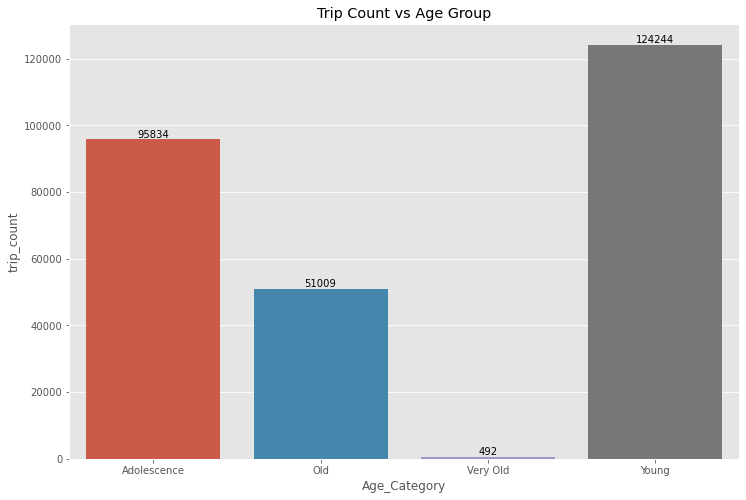

In [28]:
#Filterd grouped_by_age_group by Casual Rider
grouped_casual_rider = grouped_by_age_group[grouped_by_age_group["Subscription"] == "Casual Rider"]

#Visualization
ax = sn.barplot(x = "Age_Category", y = "trip_count", data = grouped_casual_rider)
plt.title("Trip Count vs Age Group")
for i in ax.containers:
    ax.bar_label(i,)

In contrast to subscribed riders, we can see that the bulk of casual riders are Adult(29-38) and Young(16-28), since they both have over 9000 rides count.

Identifying which which station most Casual Rider ride to:

I first removed subscribed riders from the dataset, then grouped the data set by to_station and used ride count as the aggregate function.

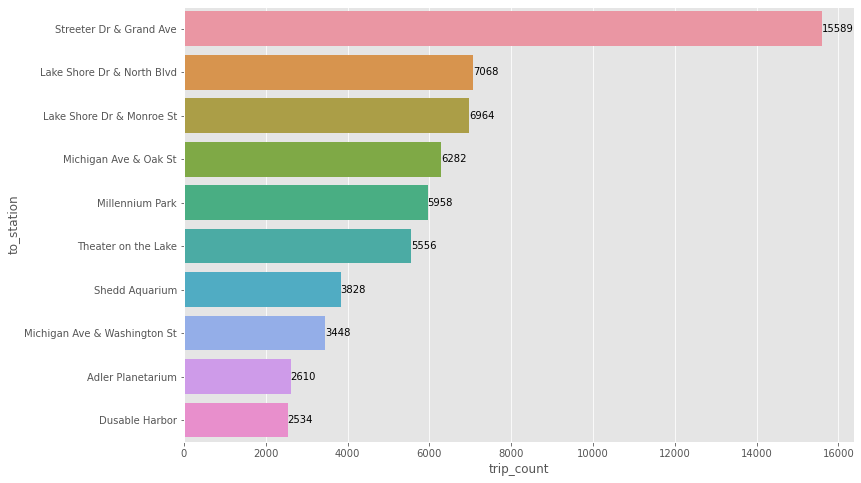

In [24]:
#Filtering to casual rider
casual_rider = cyclistic[cyclistic["Subscription"] == "Casual Rider"]

#Grouping by to_station and trip count
casual_rider = casual_rider.groupby("to_station")["trip_id"].count()

#Chaning the data set to frame
casual_rider = casual_rider.to_frame()

#Reseting the index
casual_rider = casual_rider.reset_index()

#Renaming the trip_id column 
casual_rider = casual_rider.rename(columns = {"trip_id":"trip_count"})

#Sorting by trip count
casual_rider = casual_rider.sort_values(by = "trip_count", ascending= False)

#Selecting the top 10 stations casual riders ride to
casual_rider = casual_rider[casual_rider["trip_count"] > 2471]

#Visaulizing
ax = sn.barplot(x = "trip_count", y = "to_station", data = casual_rider)
for i in ax.containers:
    ax.bar_label(i,)

According to this visualization, the most common destinations for casual riders are Streeter Dr. & Grand Ave, Lake Shore Dr & North Blvd, Lake Shore Dr. & Monroe St, Michigan Ave & Oak St, Millennium Park with 15589, 7068, 6964, 6282, 5958 respectivly.

How diffrent rider ride at each time of the day:
Here, I created a case statement to divide the start times into early morning, late afternoon, evening, and night riders. To determine how different riders bike at different times of the day, I grouped by the new start time and subscription.

In [74]:
#changing the start_date column to the diffrent category of day time
cyclistic.loc[cyclistic['start_time'].between("07:00", "11:59"), 'start_time'] = 'Morning Rider'
cyclistic.loc[cyclistic['start_time'].between("12:00", "18:59"), 'start_time'] = 'Afternoon Rider'
cyclistic.loc[cyclistic['start_time'].between("19:00", "23:59"), 'start_time'] = 'Evening Rider'
cyclistic.loc[cyclistic['start_time'].between("00:00", "03:59"), 'start_time'] = 'Midnight Rider'
cyclistic.loc[cyclistic['start_time'].between("04:00", "06:59"), 'start_time'] = 'Early Morning Rider'
cyclistic

,trip_id,start_date,start_time,end_date,end_time,start_day,bike_id,trip_duration,from_station_id,from_station,to_station_id,to_station,Subscription,gender,birthyear,Age_Category
0,21742443,2019-01-01,Midnight Rider,2019-01-01,00:11,Tue,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscribed Rider,Male,1989,Adolescence
1,21742444,2019-01-01,Midnight Rider,2019-01-01,00:15,Tue,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscribed Rider,Female,1990,Adolescence
2,21742445,2019-01-01,Midnight Rider,2019-01-01,00:27,Tue,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscribed Rider,Female,1994,Young
3,21742446,2019-01-01,Midnight Rider,2019-01-01,00:43,Tue,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscribed Rider,Male,1993,Young
4,21742447,2019-01-01,Midnight Rider,2019-01-01,00:20,Tue,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscribed Rider,Male,1994,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642289,25962900,2019-12-31,Evening Rider,2020-01-01,00:15,Tue,2196,1172,112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscribed Rider,Male,1981,Old
642290,25962901,2019-12-31,Evening Rider,2020-01-01,00:22,Tue,4877,1533,90,Millennium Park,90,Millennium Park,Subscribed Rider,Male,1992,Young
642291,25962902,2019-12-31,Evening Rider,2020-01-01,00:05,Tue,863,520,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscribed Rider,Male,1967,Old
642292,25962903,2019-12-31,Evening Rider,2020-01-01,00:05,Tue,2637,514,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscribed Rider,Female,1970,Old


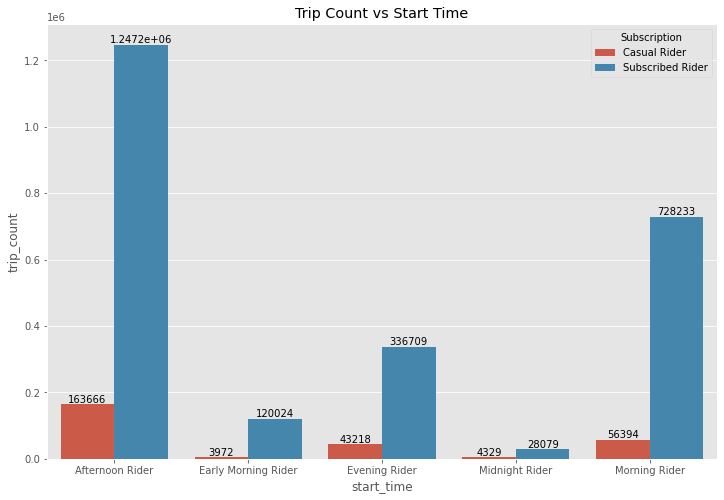

In [75]:
#Group by start_time and subscription
grouped_by_day_time = cyclistic.groupby(["start_time", "Subscription"])["trip_id"].count()

#Converting to frame
grouped_by_day_time = grouped_by_day_time.to_frame()

#Reseting the index
grouped_by_day_time = grouped_by_day_time.reset_index()

#Chaning the column trip_id to trip_count
grouped_by_day_time = grouped_by_day_time.rename(columns = {"trip_id":"trip_count"})

#Visualization
ax = sn.barplot(x = "start_time", y = "trip_count", data = grouped_by_day_time, hue = "Subscription")
plt.title("Trip Count vs Start Time")
for i in ax.containers:
    ax.bar_label(i,)

Here, we can observe that both casual and subscribed cyclists tend to ride more in the afternoon (12:00 - 18:59).

# Findings

1. How annual members and casual riders differ

i. Majority of Cyclistic members are subscribed holding 90.06% of the total population while Casual riders holds 9.94%.

ii. Casual riders' average trip duration decreases steadily from the beginning of the week until Thursday, peaking on Friday, whereas Subscribed riders' average trip duration decreases over the week and peaks on Saturday.

iii. Casual riders bike more on weekends and less on weekdays, whereas subscribers ride more on weekdays and less on weekends.

iv. Most of subscribed rider are adults (29-38 Years Old) and old (39-68 Years Old) riders while most of casual riders are young (16-28 Years Old) and adult (29-38 Years Old) riders.

v. Subscribed riders prefer early morning rides(04:00-06:59)over midnight rides, but casual riders(00:00-03:59) prefer midnight rides over early morning rides(04:00-06:59).

2. Why casual riders would buy a membership

Because casual subscribers travel longer and more frequent excursions on weekends, the marketing department may devise programs such as digital treasure hunts, exploration routes, guided tours, and others to entice them to interact more actively. Annual members may receive priority access to bikes during certain events, prompting casual customers to upgrade.

3. How digital media could affect their marketing tactics.

According to current study, worldwide consumers aged 20 to 29 are the most active users of social media, which is similar to the social media age demographics in the United States. This age group accounts for roughly one-third (32.2%) of all social media users globally. The bulk of these users are men. They account for 18.1% of all social media users, compared to 14.1% of female users aged 20 to 29.

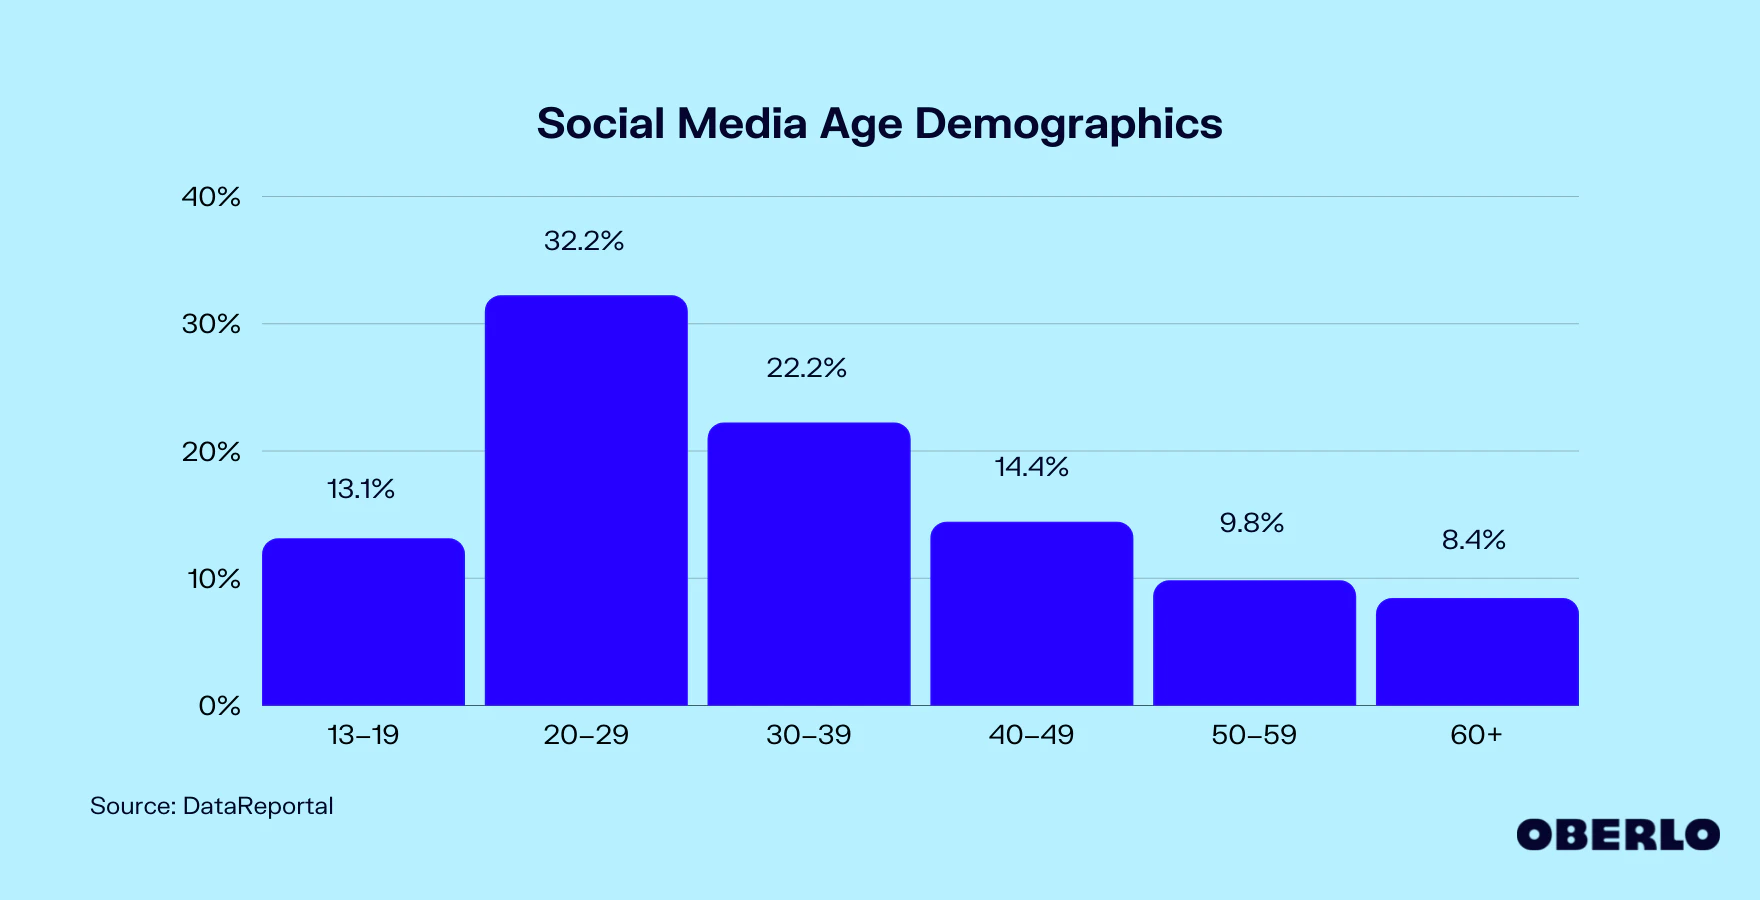

Our data shows that the majority of casual cyclists are young (16-28 years old), and current research shows that those aged 20 to 29 are the most active users of social media, thus digital media marketing would be directly reaching the cyclistic target audience of Casual Riders.

# Recommendations

1. Our analysis indicates that the top 5 stations most Casual riders ride too are :

i. Streeter Dr. & Grand Ave,

ii. Lake Shore Dr & North Blvd, 

iii. Lake Shore Dr. & Monroe St, 

iv Michigan Ave & Oak St and

v. Millennium Park

An advertisement in the above-mentioned stations would likewise reach the target group.